<a href="https://colab.research.google.com/github/xuxiufeng/Blockchain_Simulations_Revised/blob/main/Expected_Time_Gamma_and_Weibull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.stats import weibull_min
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
np.random.seed(1)

In [ ]:
def ET_m(m, eta, delta, alpha, beta):
    def T_m(m, eta, delta, alpha, beta):
        sum_of_y = 0
        y = weibull_min.rvs(c=beta, scale=alpha)
        sum_of_x = np.sum(np.random.gamma(eta, delta, m))
        while sum_of_x > y:
            sum_of_y = sum_of_y + y
            sum_of_x = np.sum(np.random.gamma(eta, delta, m))
            y = weibull_min.rvs(c=beta, scale=alpha)
        return(sum_of_y + sum_of_x)

    ET = np.repeat(np.nan, m)
    for i in range(m):
        T_0 = 0
        iter = 130000 # iter 130000
        for j in range(iter):
            T_0 += T_m(i+1, eta, delta, alpha, beta)
        ET[i] = T_0/iter
    return(ET)

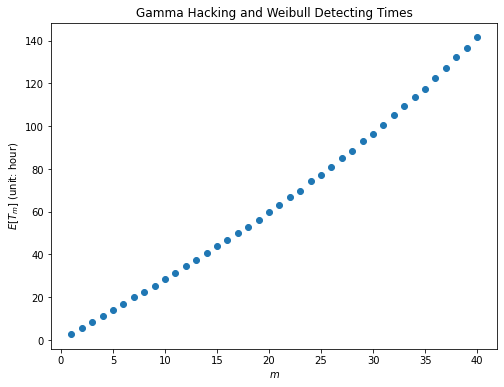

In [ ]:
m = 40
eta = 0.02
delta = 200
alpha = 110
beta = 150
ET_m = ET_m(m, eta, delta, alpha, beta)
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), ET_m)
plt.xlabel(r'$m$')
plt.ylabel(r'$E[T_m]$ (unit: hour)')
plt.title('Gamma Hacking and Weibull Detecting Times')
plt.show()

In [2]:
m = 40
alpha = 110
beta = 150

In [13]:
R = 10
C_2 = [c**.02  for c in range(1, m+1)]
C_1 = [c**.001  for c in range(1, m+1)]
E_mNR = np.repeat(np.nan, m)
for j in range(m):
  E_mNR[j] = R - C_2[j] - C_1[j]/(alpha*(math.gamma(2+1/beta)))
m_max = np.where(E_mNR == max(E_mNR))[0][0] + 1
print(m_max, max(E_mNR))

1 8.990934807867134


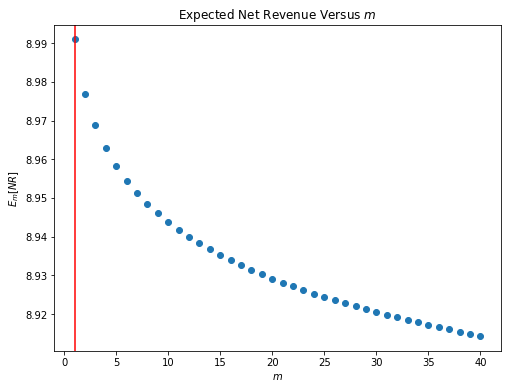

In [14]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), E_mNR)
plt.axvline(x = m_max, c='red')
plt.xlabel(r'$m$')
plt.ylabel(r'$E_m[NR]$')
plt.title(r'Expected Net Revenue Versus $m$')
plt.show()